# Raccolta dati inviati dal microbit tramite seriale

## Microbit

Sul microbit deve essere caricato l'apposito programma che legge i dati dal sensore e lo invia tramite porta seriale (USB).

Questo il codice per leggere valori di temperatura dal sensore integrato sul microbit:

```python
def invia_dati():
    serial.write_line(str(input.temperature()))
basic.forever(invia_dati)  
```

Questo il codice per leggere valori di luminosità (0 -255) usando i led integrati sul microbit:

```python
def invia_dati():
    serial.write_line(str(input.light_level()))
basic.forever(invia_dati)  
```

Il microbit può essere programmato dal sito:

https://makecode.microbit.org/

## Libreria per la comunicazione seriale
comando per installare la libreria necessaria per comunicare con la seriale.
Da inserire in una cella in modalità codice.
```
!pip install pyserial
```

## Librerie usate

In [1]:
from time import sleep
import serial
import numpy as np

## Porta COM

Prima di collegarsi con il programma python alla seriale bisogna conoscere il nome della porta in uso. Tale informazione la si può trovare su Windows con *Gestione dispositivi*.

Collegato il microbit al computer tramite cavo USB, il dispositivò comparità nell'elenco, come mostrato in figura.


![](gestionedispositivi.png)

Tramite il comando *serial.Serial()* si apre una connesione verso la porta specificata, in questo esempio la **COM7** con il baudrate specificato. Per microbit tale valore corrisponde a 115200.

```
serialPort = serial.Serial(port = "COM7", baudrate=115200)
```

I dati vengono letti dal comando *serialPort.readLine()* che memorizza nella variabile *serialString* il contenuto. Il vontenuto viene decodificato secondo la codifica ASCII. I dati inviati dal microbit finiscono con un ritorno a capo *\n* avendo usato i comandi scrittura e lettura di una riga. Il comando *strip()* elimina il ritorno a capo presente. In questo modo si avrà solamente il valore numerico fornito dal sensore.

```
serialString = serialPort.readline()
data[i]=serialString.decode('Ascii').strip()
```

Il comando *sleep()* permette una pausa di X secondi tra un'acquisizione e l'altra dei dati. In questo esempio viene usata una pausa di un secondo. Essendo 30 i dati catturati il tempo ri degistrazione corrisponde a 30 secondi.

In [3]:
data = np.zeros(30)
serialPort = serial.Serial(port = "COM7", baudrate=115200)

for i in range(30):
    serialString = serialPort.readline()
    data[i]=serialString.decode('Ascii').strip()
    print(data[i])
    sleep(1)
serialPort.close()

0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
3.0
4.0
9.0
13.0
18.0
24.0
29.0
42.0
48.0
56.0
63.0
70.0


In [4]:
data

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  2.,  3.,  4.,  9., 13., 18., 24., 29., 42.,
       48., 56., 63., 70.])

## Possibile elaborazione dei dati ottenuti
Usando ad esempio matplotlib è possibile graficare i dati memorizzati nel vettore data.

In [5]:
import matplotlib.pyplot as plt

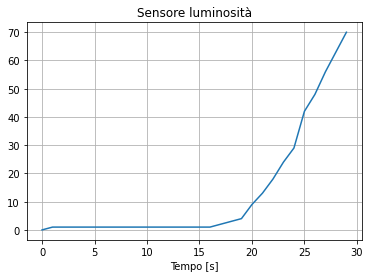

In [8]:
plt.plot(data)
plt.title('Sensore luminosità')
plt.grid()
plt.xlabel('Tempo [s]')
plt.show()